# Machine Learning project

### Gruppo 7:
- **Emanuele Conforti (252122)**
- **Jacopo Garofalo (252093)**
- **Gianmarco La Marca (252256)**

## **Heart disease Dataset**

### **Business Understanding**

- **Scenario**
    - CMS compiles claims data for Medicare and Medicaid patients across a variety of categories and years. This includes Inpatient and Outpatient claims, Master Beneficiary Summary Files, and many other files. Indicators from this data source have been computed by personnel in CDC's Division for Heart Disease and Stroke Prevention (DHDSP).
The system is designed to integrate multiple indicators from many data sources to provide a comprehensive picture of the public health burden of CVDs and associated risk factors in the United States. The data are organized by location (national and state) and indicator. The data can be plotted as trends and stratified by sex and race/ethnicity.
- **Goal**
    - Define an automatic procedure for categorizing cardiovascular diseases 

### **Data Understanding**

| Column Name                   	| Description                                                                                                     	| Type                      	|
|-------------------	|------------------------------------------------	|-----------------      	|
| ID               	| Patient’s ID                    	|  Numeric                      	|
| Age               	| Patient’s age                 	|  Numeric             	|    
| Sex                	| Patient’s gender: F or M      	|  Binary                      	|
|      BP        	|        Blood Pressure: HIGH, NORMAL or LOW       	|   Categorical                       	|
|       Cholesterol         	|   Concentration of cholesterol in the blood: NORMAL or HIGH          	|   Binary    	|
|     Na           	|    Concentration of sodium in the blood       |     Numeric                    | 
|     K          	|   Concentration of potassium in the blood        	|   Numeric                       	|
|     Drug          	|      The chosen cure: drugY, drugC, drugX, drugA, drugB            	|      Categorical                    	|

# TODO

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
plt.style.use('ggplot')

df = pd.read_csv('heart_disease_data.csv')
df

,Year,LocationAbbr,LocationDesc,DataSource,PriorityArea1,PriorityArea2,PriorityArea3,PriorityArea4,Category,Topic,...,Break_Out_Category,Break_Out,CategoryId,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID,GeoLocation
0,2006,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Heart Failure,...,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,NaN
1,2005,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Heart Failure,...,Race,Other,C1,T5,MD501,Crude,BOC04,RAC07,59,NaN
2,2007,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Age,65+,C1,T4,MD301,Crude,BOC03,AGE06,59,NaN
3,2008,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Coronary Heart Disease,...,Gender,Female,C1,T4,MD301,Crude,BOC02,GEN02,59,NaN
4,2004,US,United States,Medicare,NaN,NaN,NaN,NaN,Cardiovascular Diseases,Heart Failure,...,Overall,Overall,C1,T5,MD501,Crude,BOC01,OVR01,59,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42635,2012,CO,Colorado,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Gender,Male,C1,T6,MD601,Crude,BOC02,GEN01,8,"(38.843840757000464, -106.13361092099967)"
42636,2010,MI,Michigan,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Gender,Female,C1,T6,MD601,Crude,BOC02,GEN02,26,"(44.6613195430005, -84.71439026999968)"
42637,2012,ME,Maine,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Race,Hispanic,C1,T6,MD601,Crude,BOC04,RAC04,23,"(45.254228894000505, -68.98503133599962)"
42638,2013,ID,Idaho,Medicare,Million Hearts,NaN,NaN,NaN,Cardiovascular Diseases,Stroke,...,Race,Non-Hispanic White,C1,T6,MD601,Crude,BOC04,RAC01,16,"(43.682630005000476, -114.3637300419997)"


#### **Number of rows and cols**

In [23]:
df.shape

(42640, 29)

#### **Number of elements in the matrix**

In [24]:
df.size

1236560

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42640 entries, 0 to 42639
Data columns (total 29 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        42640 non-null  int64  
 1   LocationAbbr                42640 non-null  object 
 2   LocationDesc                42640 non-null  object 
 3   DataSource                  42640 non-null  object 
 4   PriorityArea1               9360 non-null   object 
 5   PriorityArea2               0 non-null      float64
 6   PriorityArea3               14560 non-null  object 
 7   PriorityArea4               0 non-null      float64
 8   Category                    42640 non-null  object 
 9   Topic                       42640 non-null  object 
 10  Indicator                   42640 non-null  object 
 11  Data_Value_Type             42640 non-null  object 
 12  Data_Value_Unit             42640 non-null  object 
 13  Data_Value                  421

In [26]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,42640.0,2008.500000,2.872315,2004.0,2006.00,2008.5,2011.0,2013.0
PriorityArea2,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PriorityArea4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data_Value,42111.0,14.780896,13.286487,0.4,4.50,10.7,21.6,333.3
Data_Value_Alt,42640.0,14.572709,13.333826,-2.0,4.40,10.4,21.5,333.3
LowConfidenceLimit,42111.0,12.661509,11.453615,0.0,3.80,8.2,19.6,94.2
HighConfidenceLimit,42111.0,17.074028,17.910274,1.1,5.00,12.7,23.4,710.5
LocationID,42640.0,29.538462,16.064317,1.0,16.75,29.5,42.5,59.0


#### **Missing values**

In [27]:
df.isna().sum()

Year                              0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
PriorityArea1                 33280
PriorityArea2                 42640
PriorityArea3                 28080
PriorityArea4                 42640
Category                          0
Topic                             0
Indicator                         0
Data_Value_Type                   0
Data_Value_Unit                   0
Data_Value                      529
Data_Value_Alt                    0
Data_Value_Footnote_Symbol    42111
Data_Value_Footnote           42111
LowConfidenceLimit              529
HighConfidenceLimit             529
Break_Out_Category                0
Break_Out                         0
CategoryId                        0
TopicId                           0
IndicatorID                       0
Data_Value_TypeID                 0
BreakOutCategoryId                0
BreakOutId                        0
LocationID                  

There's some missing value for attributes:
- *PriorityArea1*
- *PriorityArea2*
- *PriorityArea3*
- *PriorityArea4*
- *Data_Value*
- *Data_Value_Footnote_Symbol*
- *Data_Value_Footnote*
- *LowConfidenceLimit*
- *HighConfidenceLimit*
- *GeoLocation*

In [28]:
threshold = 65/100 * df.shape[0]

for x in df.columns:
    if df[x].isna().sum() > threshold:
        df = df[df.columns.difference([x])]

df.shape

(42640, 23)

The following attributes have been deleted because they had more than 65% of missing values:
- **PriorityArea1**
- **PriorityArea2**
- **PriorityArea3**
- **PriorityArea4**
- **Data_Value_Footnote_Symbol**
- **Data_Value_Footnote**

**TODO: è bene fare fill sui rimanenti valori nulli o ignorarli?**

#### **Removing attributes strongly correlated**

The correlated attributes are:
- **Topic** and **TopicId**
- **Break_out** and **BreakOutId**
- **Break_out_category** and **BreakOutCategoryId**
- **Category** and **CategoryID**
- **LocationAbbr** and **LocationID**, **Geolocation**, **LocationDesc** 
- **Data_value_type** and **Data_Value_TypeID**
- **Indicator** and **IndicatorID** (we remove both)

In [29]:
df = df[df.columns.difference(['TopicId', 'BreakOutId', 'BreakOutCategoryId', 'CategoryId', 'LocationDesc', 'GeoLocation', 'LocationID', 'Data_Value_TypeID', 'Indicator', 'IndicatorID'])]
df.head()

,Break_Out,Break_Out_Category,Category,DataSource,Data_Value,Data_Value_Alt,Data_Value_Type,Data_Value_Unit,HighConfidenceLimit,LocationAbbr,LowConfidenceLimit,Topic,Year
0,Other,Race,Cardiovascular Diseases,Medicare,5.2,5.2,Crude,Percent (%),5.3,US,5.1,Heart Failure,2006
1,Other,Race,Cardiovascular Diseases,Medicare,5.1,5.1,Crude,Percent (%),5.2,US,5.1,Heart Failure,2005
2,65+,Age,Cardiovascular Diseases,Medicare,8.5,8.5,Crude,Percent (%),8.5,US,8.4,Coronary Heart Disease,2007
3,Female,Gender,Cardiovascular Diseases,Medicare,5.1,5.1,Crude,Percent (%),5.1,US,5.1,Coronary Heart Disease,2008
4,Overall,Overall,Cardiovascular Diseases,Medicare,6.1,6.1,Crude,Percent (%),6.1,US,6.1,Heart Failure,2004


#### **Convert object type attributes into categorical attributes**

Attribute to convert: 
- Break_Out
- Break_Out_Category
- Category
- DataSource
- Data_Value_Type
- Data_Value_Unit
- LocationAbbr
- Topic

In [30]:
for attribute in df.columns:
    if df[attribute].dtype == object:
        df[attribute] = df[attribute].astype('category')
        
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42640 entries, 0 to 42639
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Break_Out            42640 non-null  category
 1   Break_Out_Category   42640 non-null  category
 2   Category             42640 non-null  category
 3   DataSource           42640 non-null  category
 4   Data_Value           42111 non-null  float64 
 5   Data_Value_Alt       42640 non-null  float64 
 6   Data_Value_Type      42640 non-null  category
 7   Data_Value_Unit      42640 non-null  category
 8   HighConfidenceLimit  42111 non-null  float64 
 9   LocationAbbr         42640 non-null  category
 10  LowConfidenceLimit   42111 non-null  float64 
 11  Topic                42640 non-null  category
 12  Year                 42640 non-null  int64   
dtypes: category(8), float64(4), int64(1)
memory usage: 2.0 MB


#### **Building histograms**

**TODO: Data_Value e Data_Value_Alt sembrano simili. Se ne può eliminare uno?**

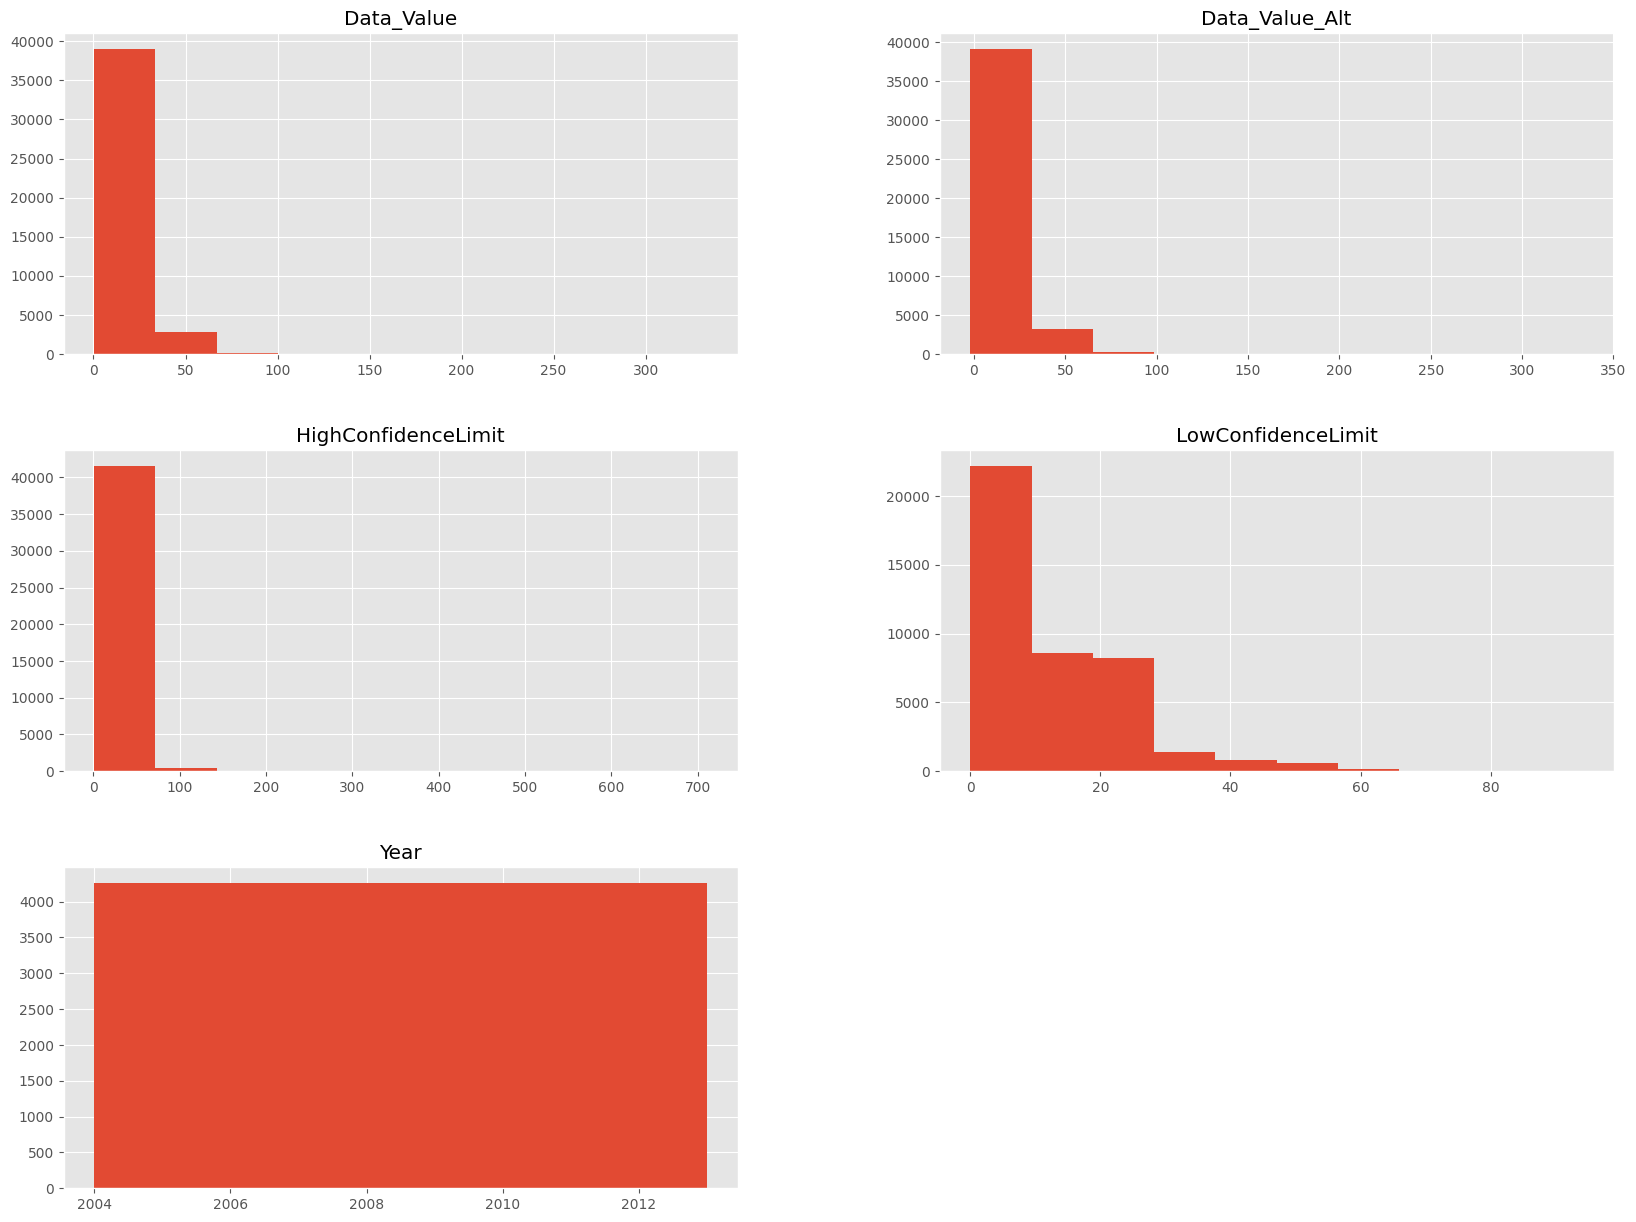

In [31]:
df.hist(figsize = (20, 15))
plt.show()

##### **Bar plots for categorical attributes**

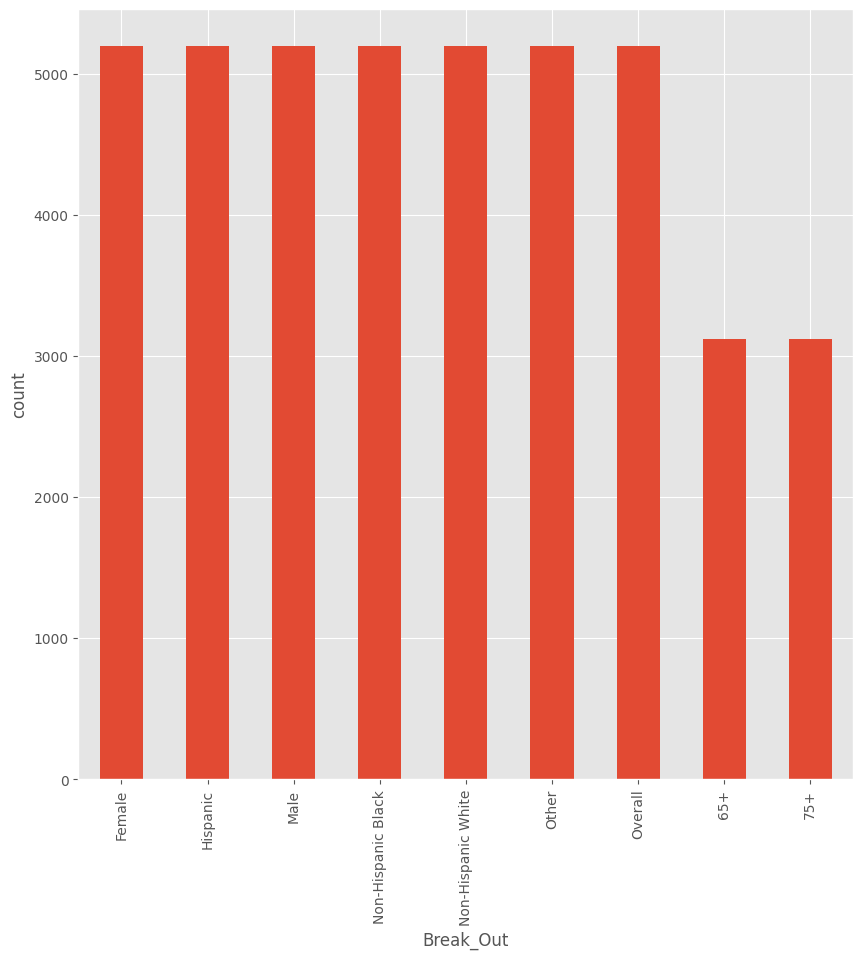

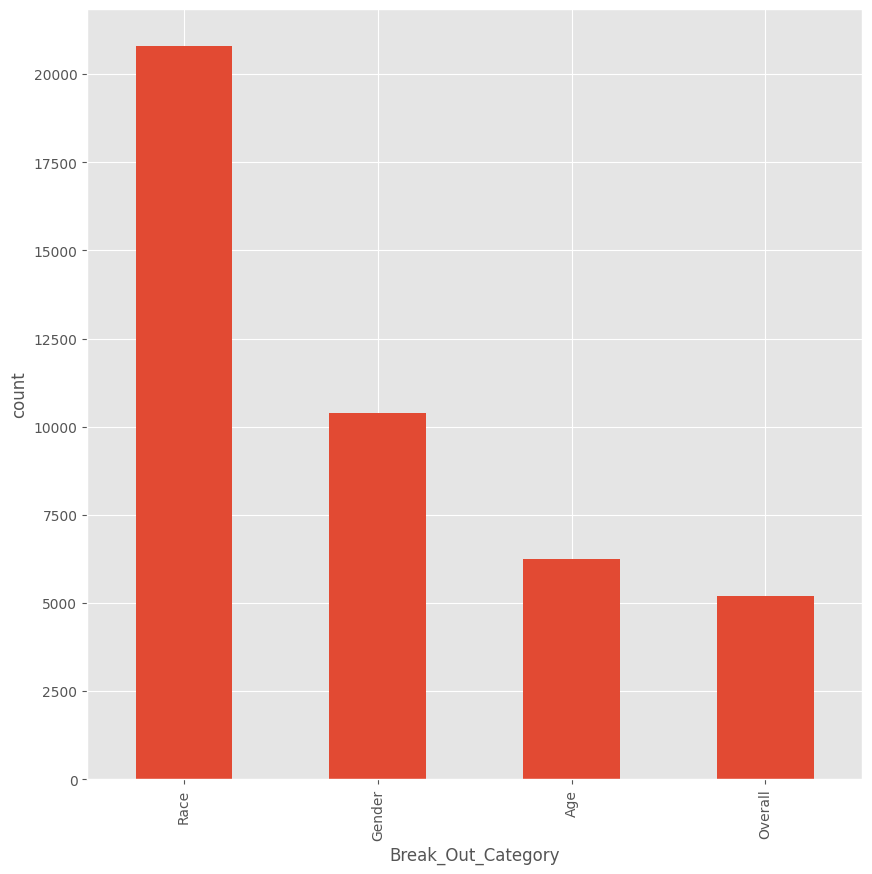

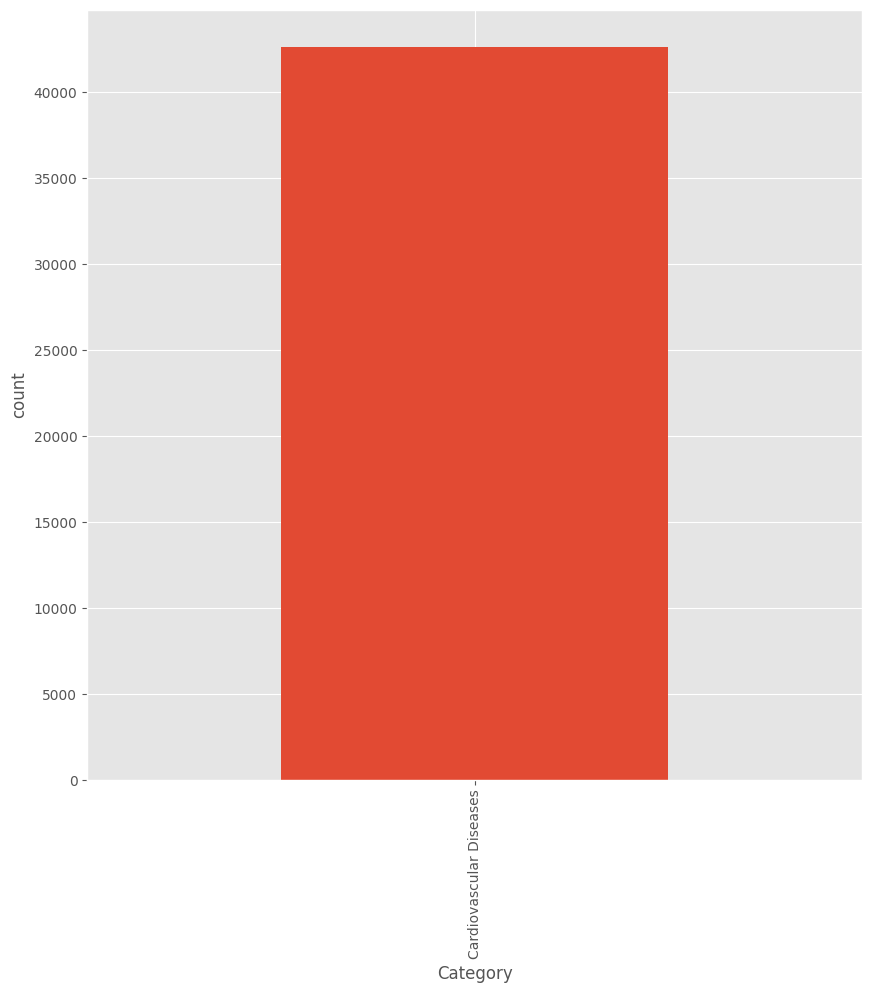

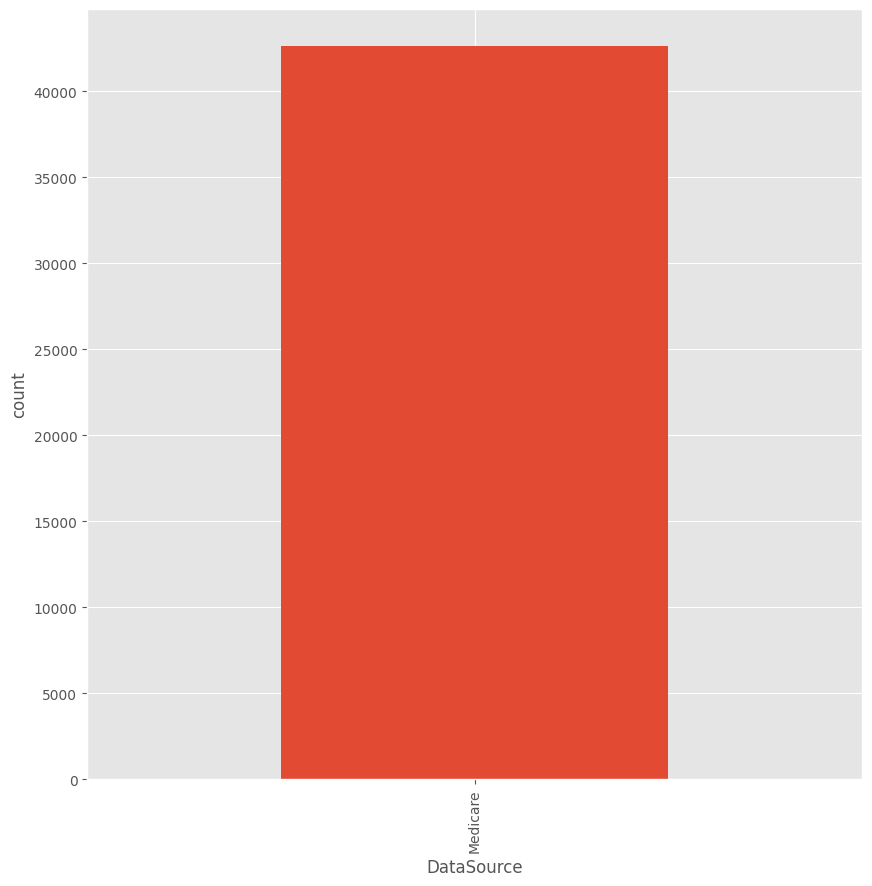

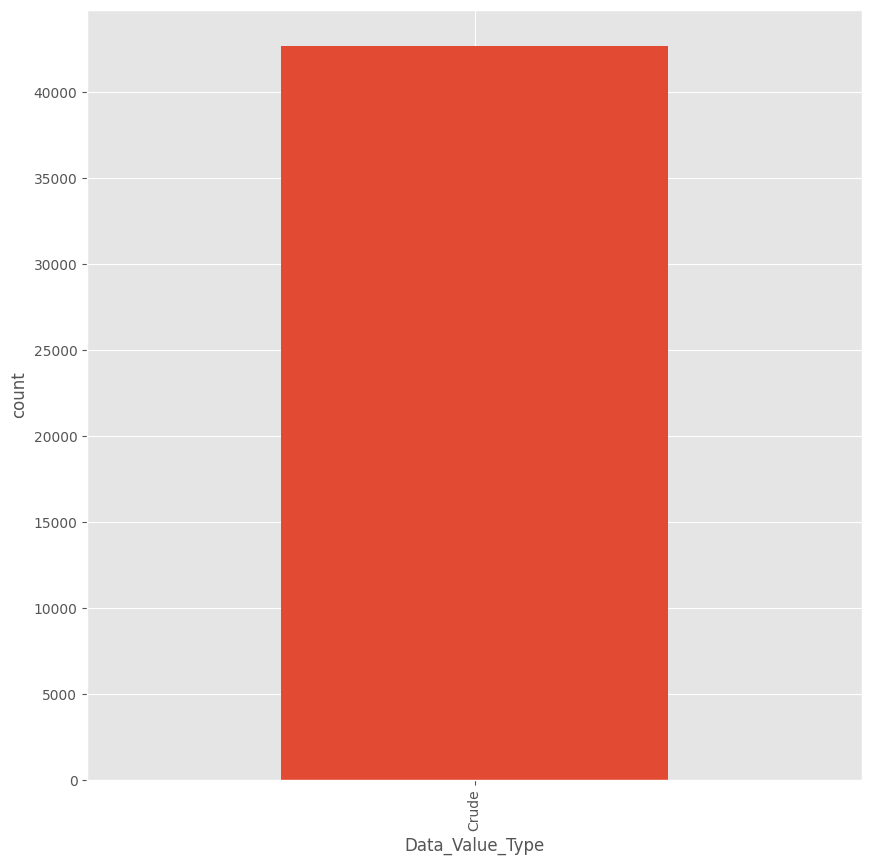

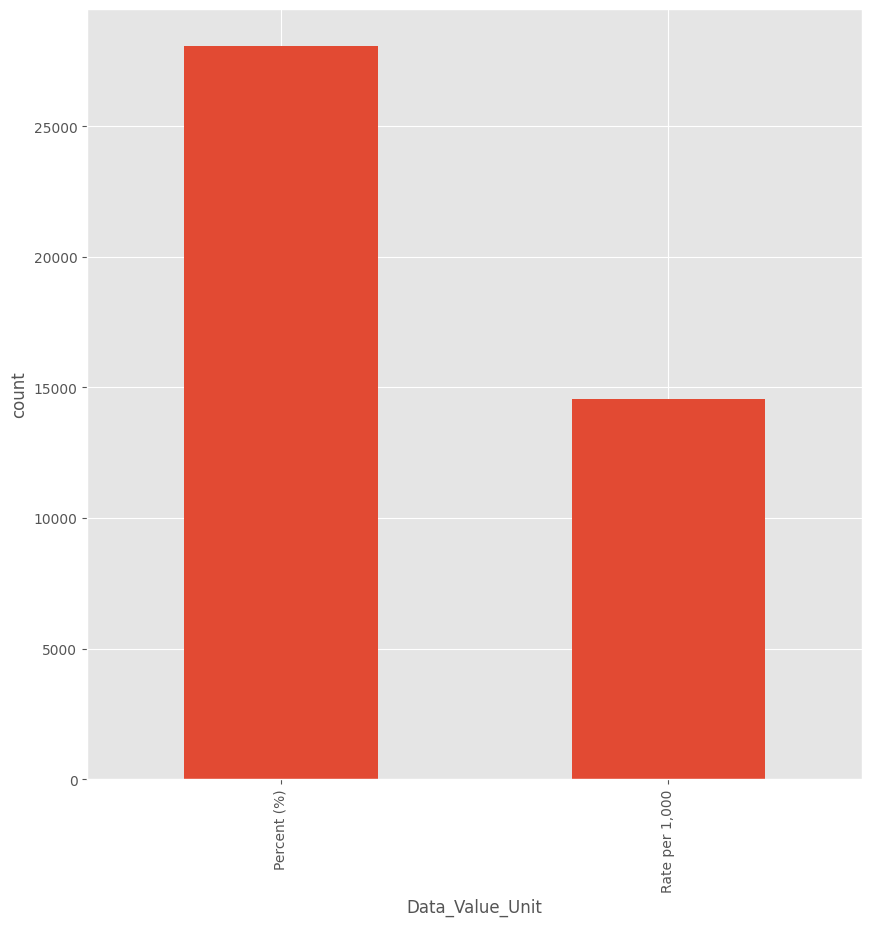

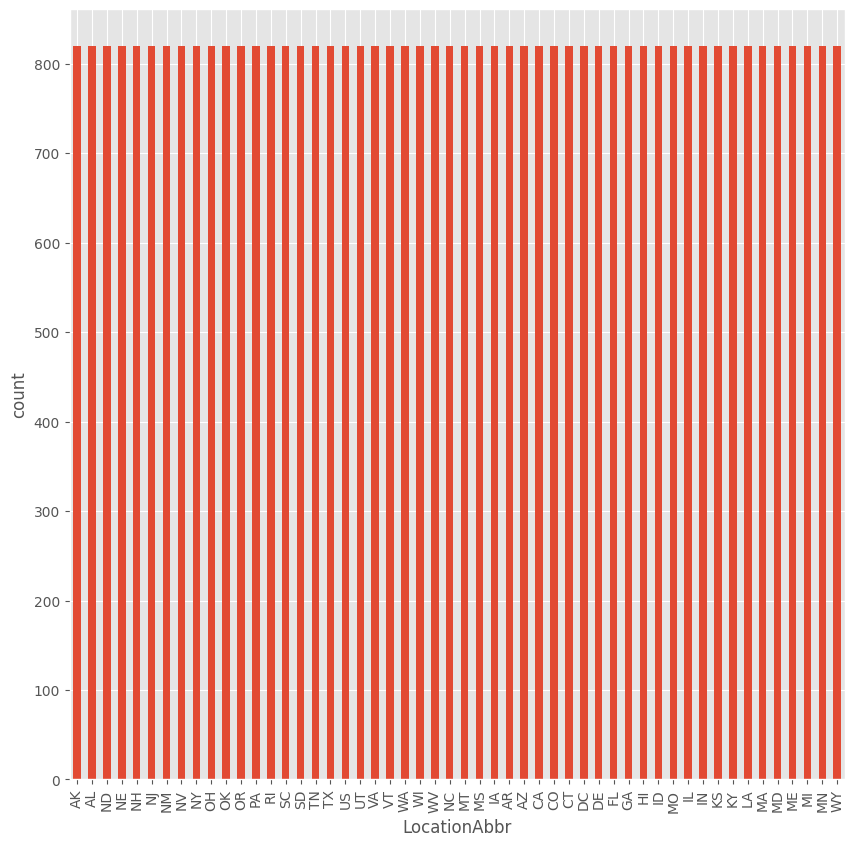

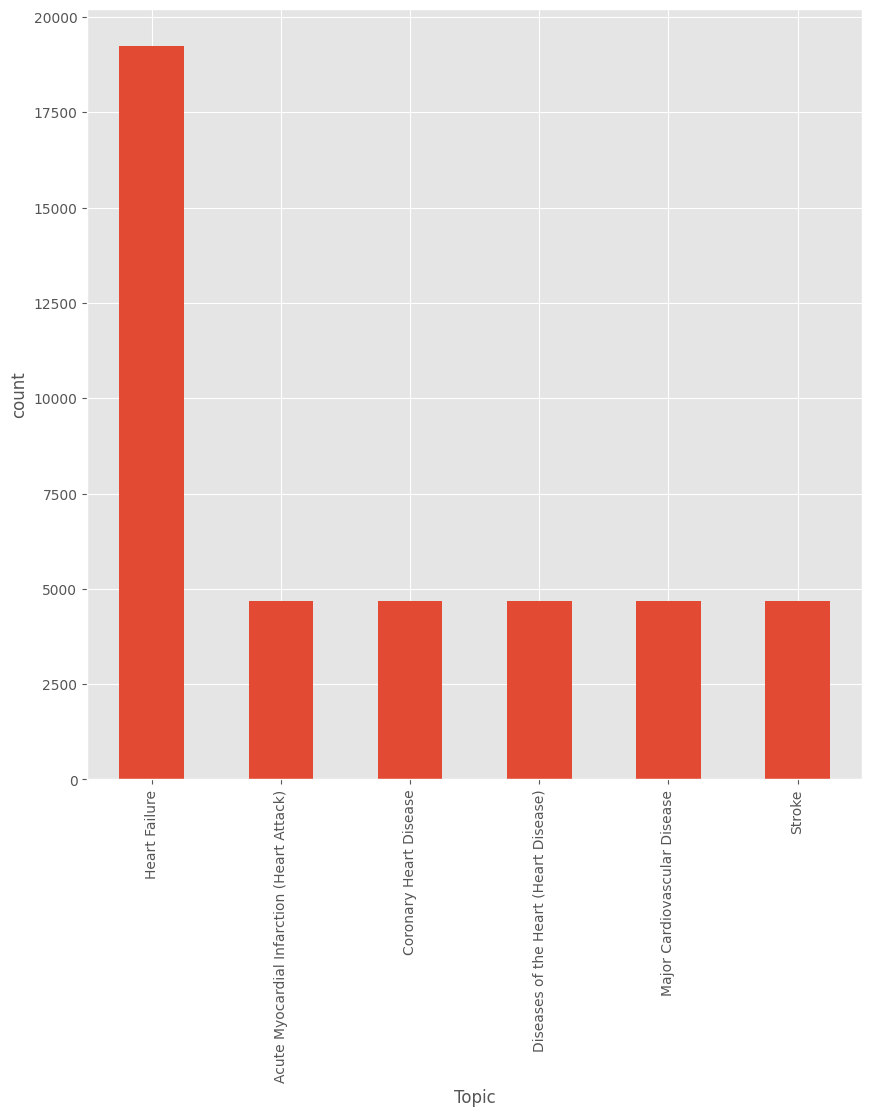

In [32]:
# categoricalAttributes = ['Break_Out', 'Break_Out_Category', 'Category', 'DataSource', 'Data_Value_Type', 'Data_Value_Unit', 'LocationAbbr', 'Topic']
for attribute in df.select_dtypes(include=["category"]):
    val = df[attribute].value_counts()
    val.plot(kind = 'bar', figsize = (10, 10))
    plt.ylabel('count')
    plt.xlabel(attribute)
    plt.show()

#### **Histograms and bar plots according to the class attributes**

In [33]:
import seaborn as sb

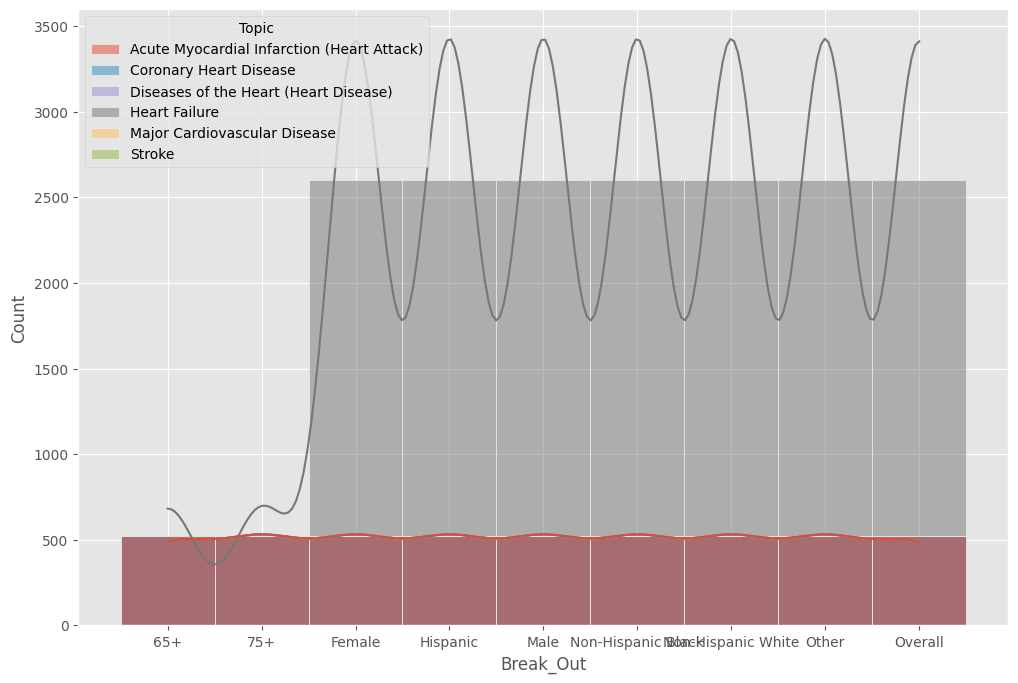

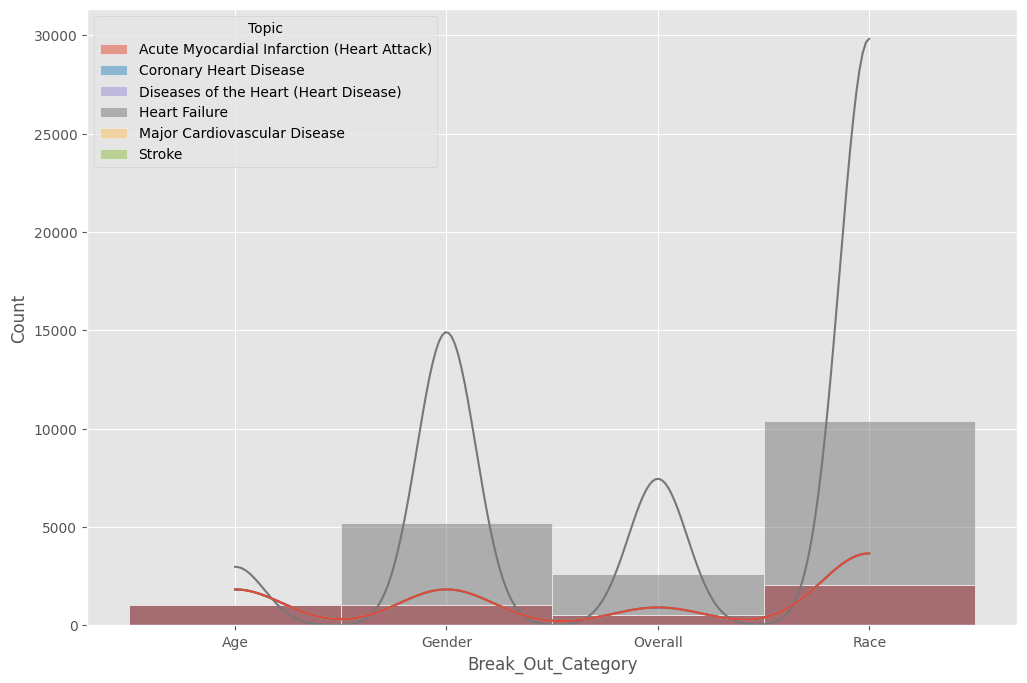

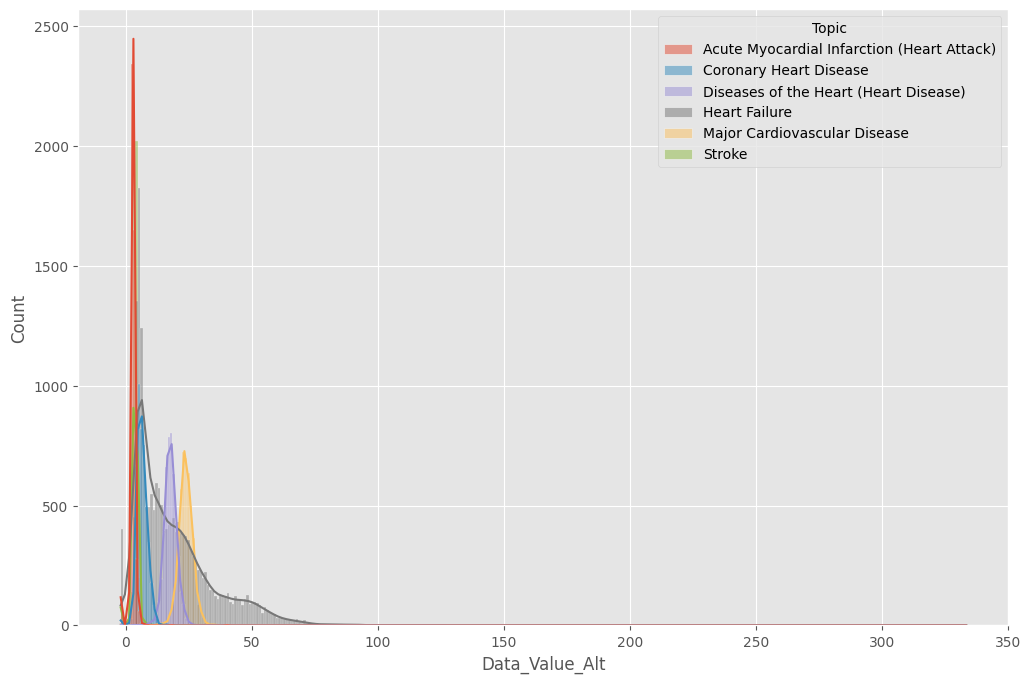

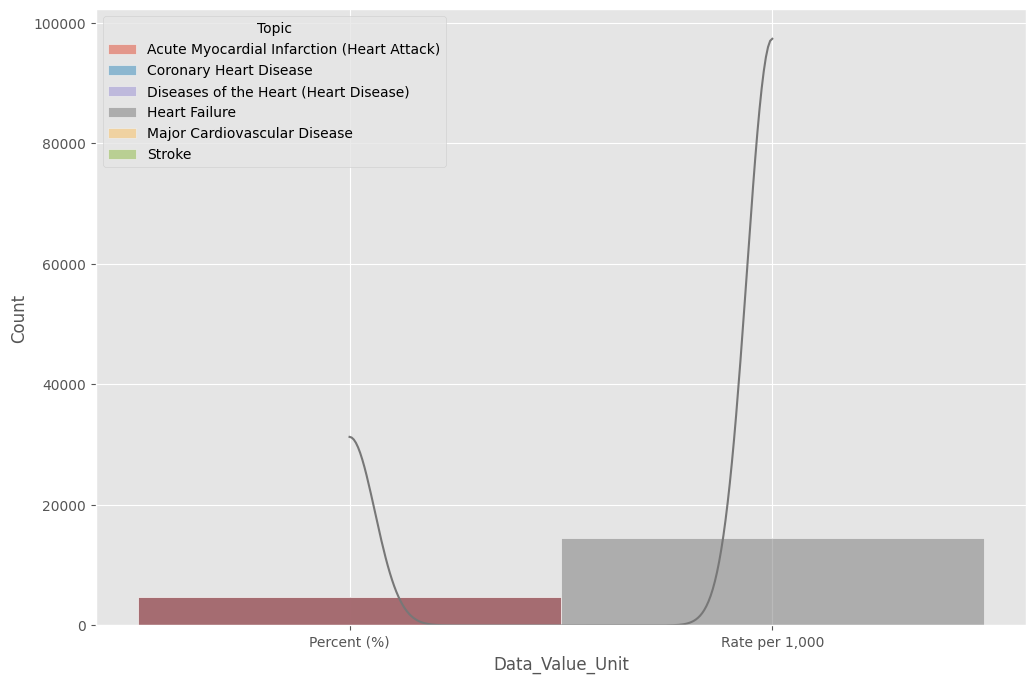

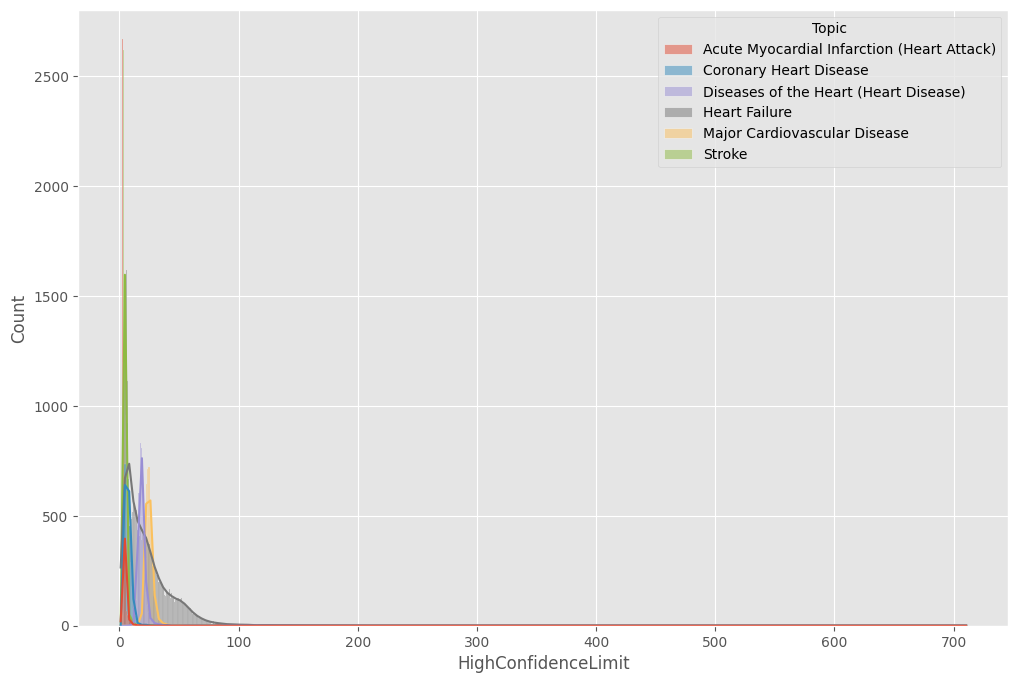

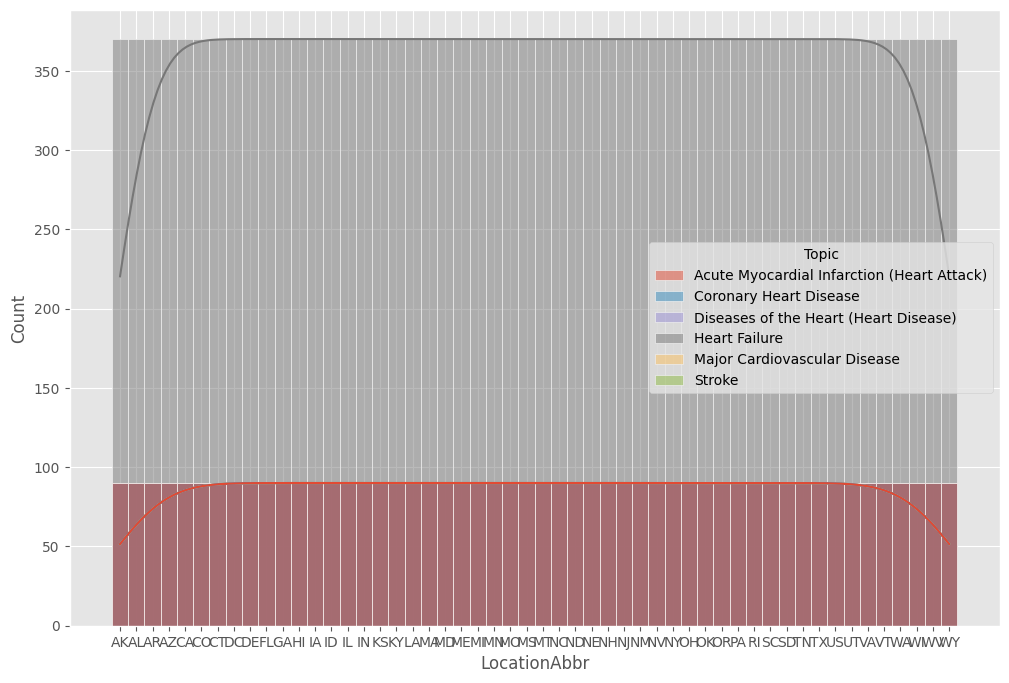

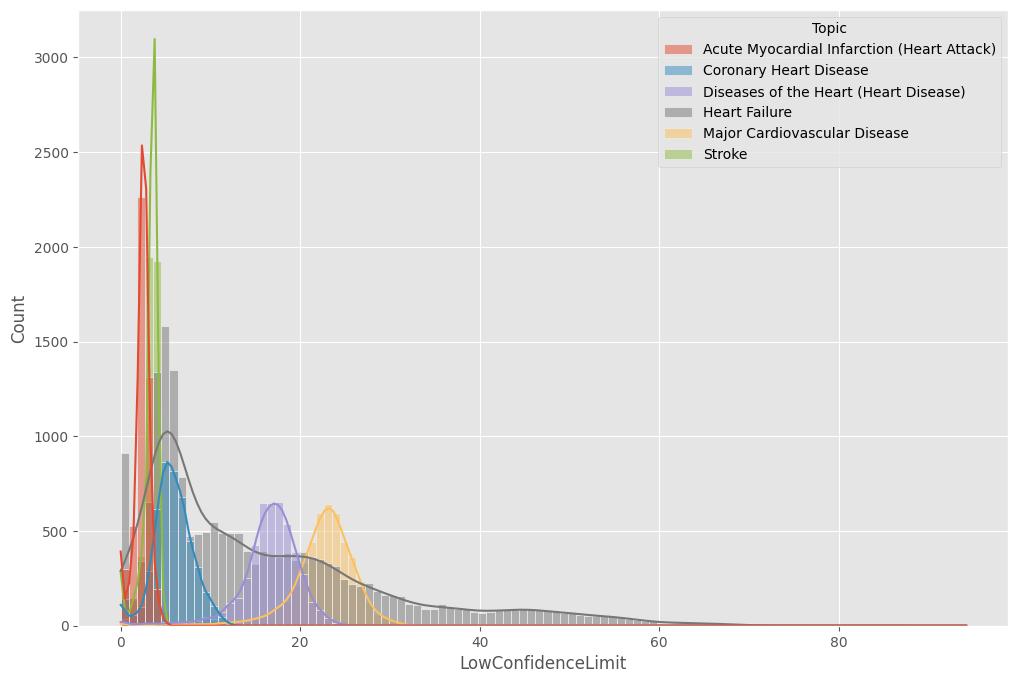

In [52]:
attributes =  df.columns.difference(['Year', 'Category', 'Data_Value_Type', 'DataSource', 'Topic'])

for attribute in attributes:
    plt.figure(figsize=(12,8))
    sb.histplot(x = df[attribute], hue = 'Topic', data = df, kde=True)
    plt.show()

# TODO: se non avessimo tolto 'Category', 'Data_Value_Type', 'DataSource' 
# (attributi con un solo valore), ci avrebbe dato un errore (matrice singolare, quindi non invertibile)

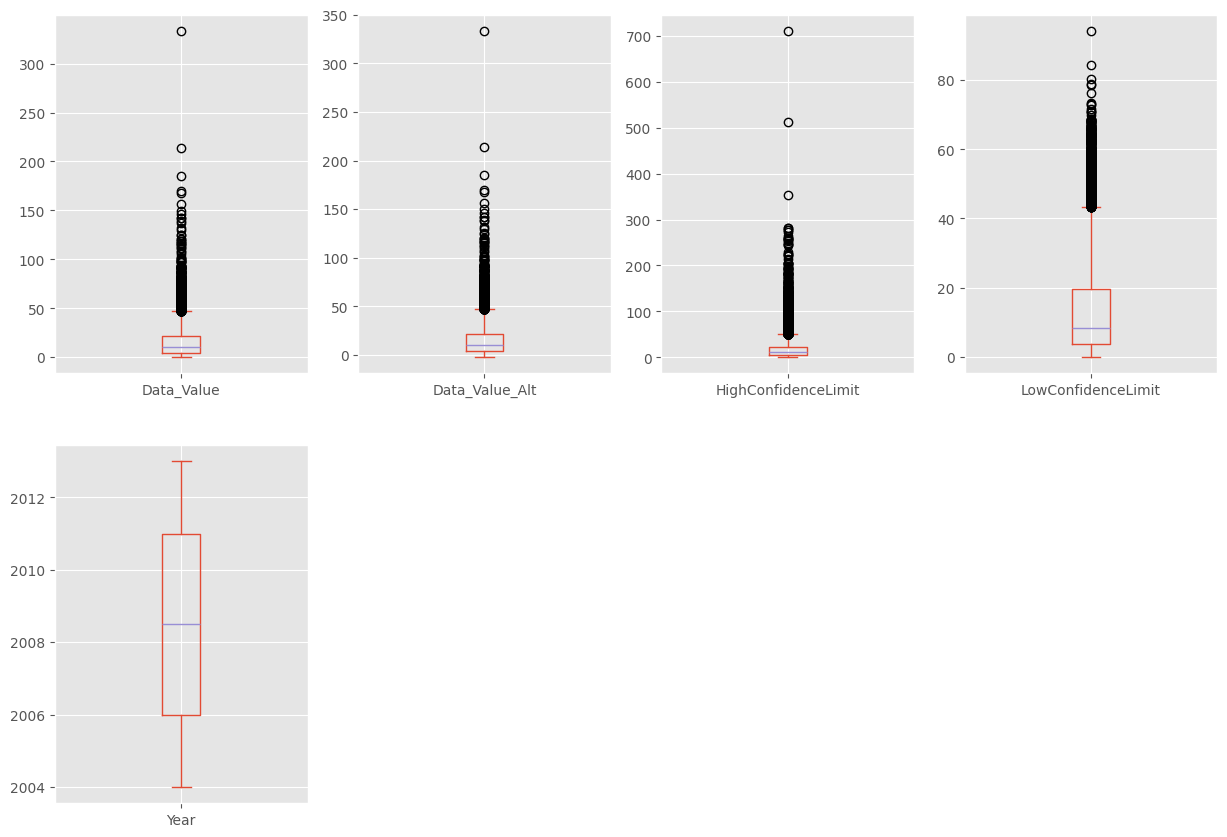

In [35]:
df.plot(kind='box', subplots=True, sharex=False, sharey=False, figsize=(15, 27), layout=(5, 4))
plt.show()

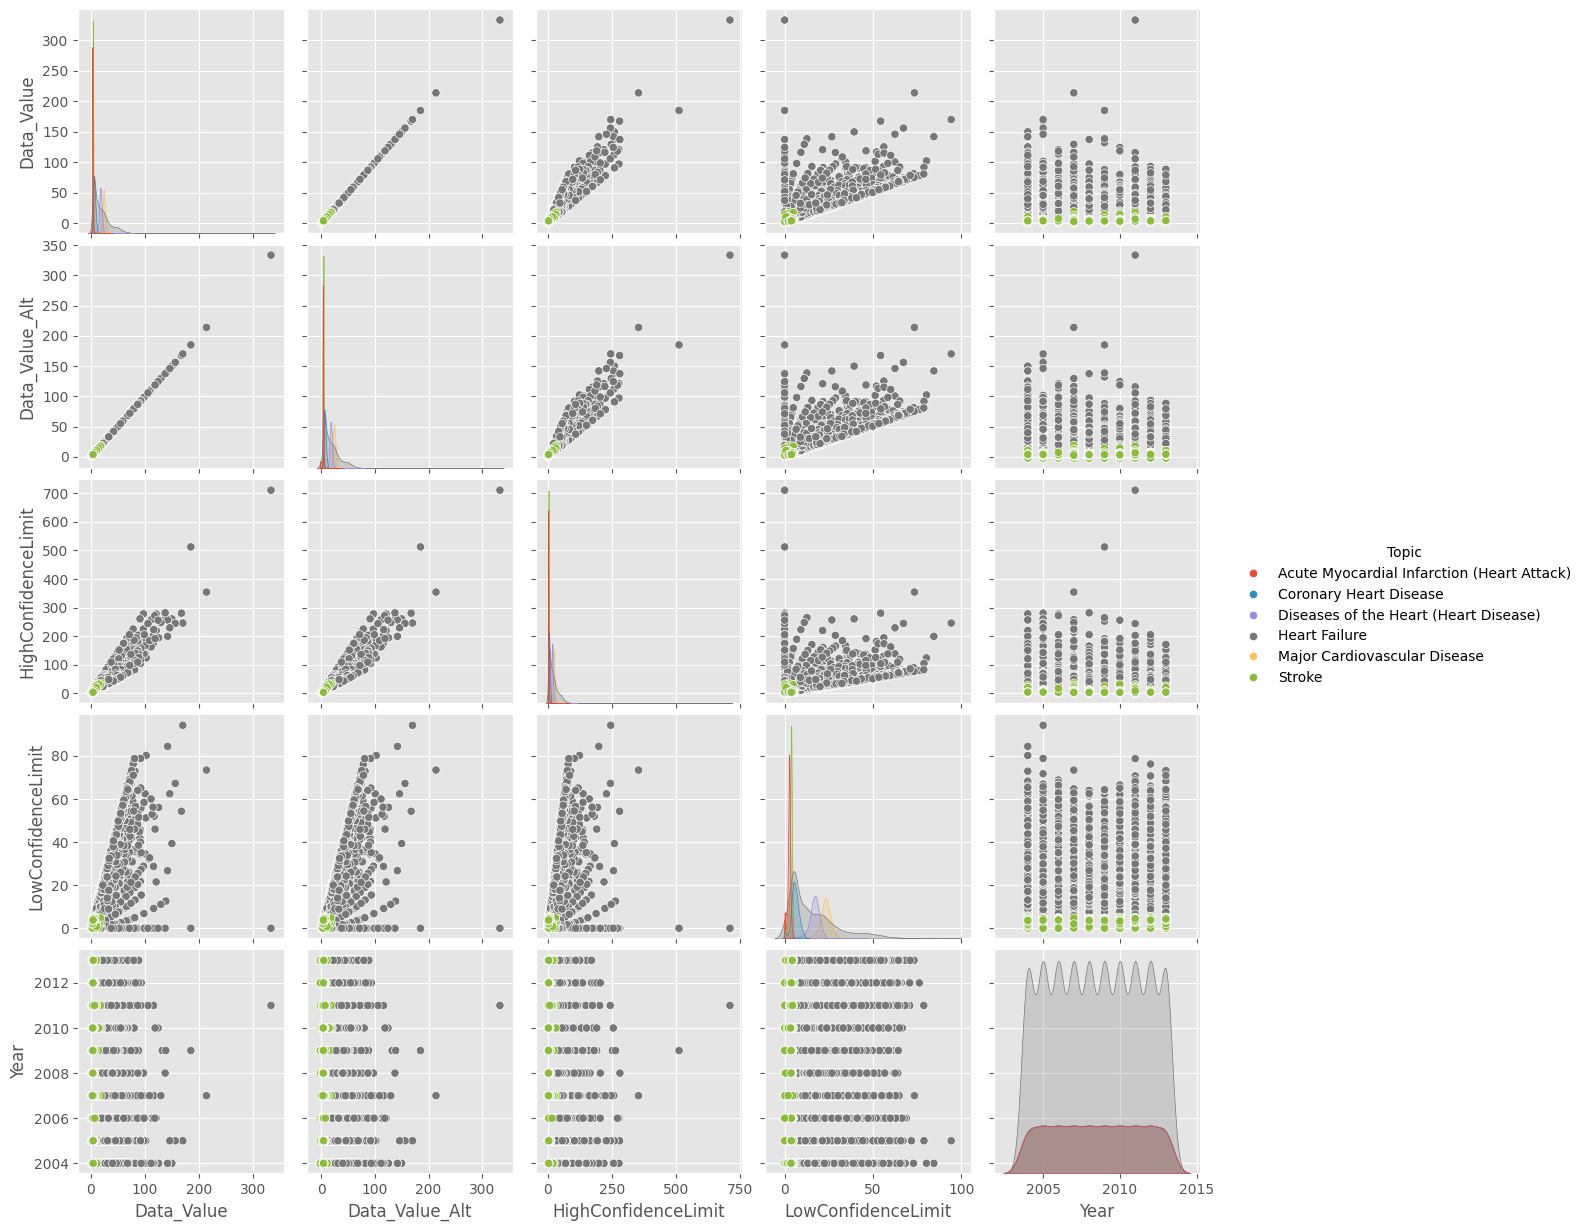

In [36]:
sb.pairplot(df, hue = 'Topic')
plt.show()

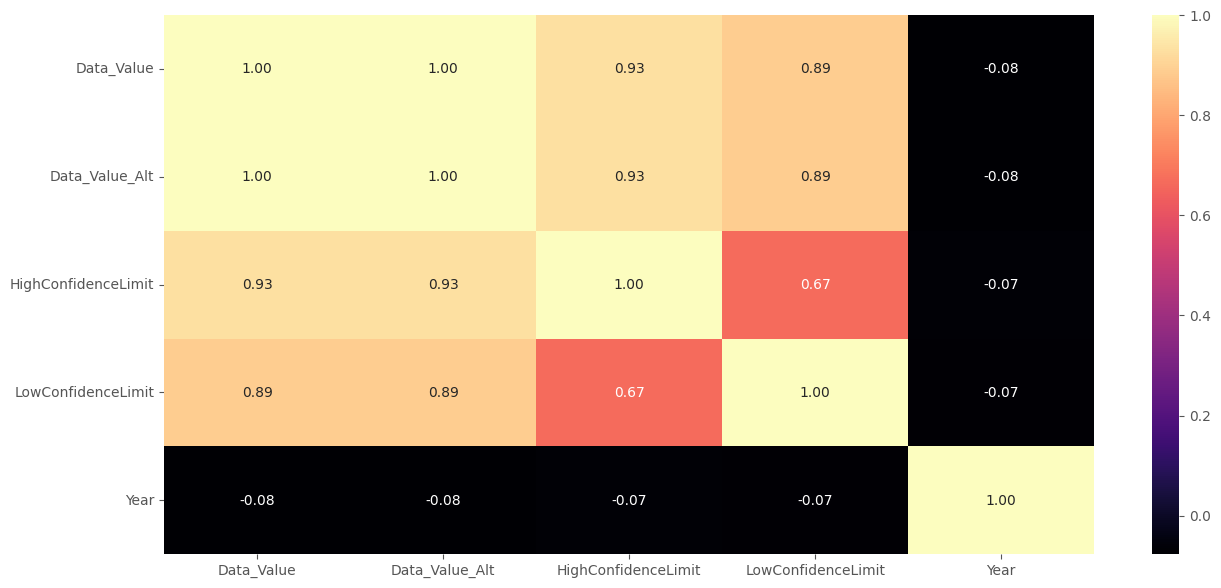

In [37]:
plt.figure(figsize=(15, 7))
sb.heatmap(df.corr(numeric_only=True), annot=True, cmap='magma', fmt='.2f')
plt.show()

### **Data Preparation**

**Remove Year attribute because it has a constant distribution (trivial, low variability)**

In [38]:
df = df[df.columns.difference(['Year'])]

**Remove Category, DataSource and Data_Value_Type because they have only one value (trivial, low variability)**

In [48]:
df = df[df.columns.difference(['Category', 'DataSource', 'Data_Value_Type'])]

#### **Remove Data_Value because its distribution is equivalent to that of Data_Value_Alt (correlation between attributes)**

In [44]:
df = df[df.columns.difference(['Data_Value'])]

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42640 entries, 0 to 42639
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Break_Out            42640 non-null  category
 1   Break_Out_Category   42640 non-null  category
 2   Data_Value_Alt       42640 non-null  float64 
 3   Data_Value_Unit      42640 non-null  category
 4   HighConfidenceLimit  42111 non-null  float64 
 5   LocationAbbr         42640 non-null  category
 6   LowConfidenceLimit   42111 non-null  float64 
 7   Topic                42640 non-null  category
dtypes: category(5), float64(3)
memory usage: 1.2 MB


#### **Discretize attributes**

*We have decided not to discretize the float attributes, because they have different distributions*

#### **Binarization of categorical attributes**

In [60]:
cat_attributes = list(df.select_dtypes(include = ['category']).columns)
cat_attributes.remove('Topic')
cat_attributes.remove('LocationAbbr')
df2 = pd.get_dummies(df, columns = cat_attributes)
new_attr_list = list(df2.columns)
new_attr_list.remove('Topic')
new_attr_list.remove('LocationAbbr')
df2 = df2[new_attr_list]
df2.head()

# TODO: capire se bisogna binarizzare o meno LocationAbbr

,Data_Value_Alt,HighConfidenceLimit,LowConfidenceLimit,Break_Out_65+,Break_Out_75+,Break_Out_Female,Break_Out_Hispanic,Break_Out_Male,Break_Out_Non-Hispanic Black,Break_Out_Non-Hispanic White,Break_Out_Other,Break_Out_Overall,Break_Out_Category_Age,Break_Out_Category_Gender,Break_Out_Category_Overall,Break_Out_Category_Race,Data_Value_Unit_Percent (%),"Data_Value_Unit_Rate per 1,000"
0,5.2,5.3,5.1,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False
1,5.1,5.2,5.1,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False
2,8.5,8.5,8.4,True,False,False,False,False,False,False,False,False,True,False,False,False,True,False
3,5.1,5.1,5.1,False,False,True,False,False,False,False,False,False,False,True,False,False,True,False
4,6.1,6.1,6.1,False,False,False,False,False,False,False,False,True,False,False,True,False,True,False


In [61]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42640 entries, 0 to 42639
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Data_Value_Alt                  42640 non-null  float64
 1   HighConfidenceLimit             42111 non-null  float64
 2   LowConfidenceLimit              42111 non-null  float64
 3   Break_Out_65+                   42640 non-null  bool   
 4   Break_Out_75+                   42640 non-null  bool   
 5   Break_Out_Female                42640 non-null  bool   
 6   Break_Out_Hispanic              42640 non-null  bool   
 7   Break_Out_Male                  42640 non-null  bool   
 8   Break_Out_Non-Hispanic Black    42640 non-null  bool   
 9   Break_Out_Non-Hispanic White    42640 non-null  bool   
 10  Break_Out_Other                 42640 non-null  bool   
 11  Break_Out_Overall               42640 non-null  bool   
 12  Break_Out_Category_Age          

### **Modeling**

#### Split dataset

In [ ]:
from sklearn.model_selection import train_test_split
import numpy as np

x = np.array(df2.values)
y = np.array(df['Drug'].values)

seed = 101
test_size = .3
val_size = .2

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=seed)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=val_size, random_state=seed)

#### Create the models

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier

from sklearn.metrics import classification_report

In [ ]:
models = []
models.append(('C45', DecisionTreeClassifier(criterion='entropy', random_state=seed)))
models.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=seed)))
models.append(('GaussianNaiveBayes', GaussianNB()))
models.append(('NeuralNetwork', MLPClassifier(hidden_layer_sizes=(50, 10, ), max_iter=500, verbose=True, 
                                              random_state=seed)))


# evaluate each model in turn

for name, model in models:
    print(name)
    
    model.fit(x_train, y_train)
    y_val_pred = model.predict(x_val)
    
    # print('Classification metrics: ')
    # print(classification_report(y_val, y_val_pred))
    print(f'Accuracy: {accuracy_score(y_val, y_val_pred):.2f}')
    print()

### **Evaluation**

#### Predictions on test set

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [ ]:
models_test = []
models_test.append(('C45', DecisionTreeClassifier(criterion='entropy', random_state=seed)))
models_test.append(('CART', DecisionTreeClassifier(criterion='gini', random_state=seed)))
models_test.append(('GaussianNaiveBayes', GaussianNB()))
models_test.append(('NeuralNetwork', MLPClassifier(hidden_layer_sizes=(50, 10, ), max_iter=500, verbose=True, 
                                              random_state=seed)))

predictions = []

for name, model in models_test:
    print(name)
    
    model.fit(x_train, y_train)
    pred = model.predict(x_test)
    predictions.append(pred)

    print(f'Accuracy: {accuracy_score(y_test, pred):.2f}')
    print()

In [ ]:
def make_confusion_matrix(cf, categories='auto', cbar=True, cmap='Blues', title=None):
    group_counts = [f'{value}\n' for value in cf.flatten()]

    box_labels = [f'{v1}'.strip() for v1 in group_counts]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    sb.heatmap(cf, annot=box_labels, fmt='', cmap=cmap, cbar=cbar, xticklabels=categories, yticklabels=categories)

    
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
    if title:
        plt.title(title)

In [ ]:
categories = df['Drug'].unique()

for i in range(len(models_test)):
    plt.figure()
    
    make_confusion_matrix(confusion_matrix(y_test, predictions[i]), categories=categories, cmap='binary')
    
    plt.title(f"Confusion Matrix for {models_test[i][0]}")
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.xticks(ticks=range(len(categories)), labels=categories)
    plt.yticks(ticks=range(len(categories)), labels=categories)
    plt.show()

##### **Compute the Roc Curve for each class**

In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
one_hot_encoding = np.array(pd.get_dummies(y_test, columns = ['Drug']))

probs = []

for _, model in models:
    model.fit(x_train, y_train)
    probs.append(model.predict_proba(x_test))

In [ ]:
fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(np.unique(y))):
    plt.figure()
    m = 0

    for name, _ in models:
        fpr[i], tpr[i], _ = roc_curve(one_hot_encoding[:, i], probs[m][:, i])
        
        roc_auc[i] = auc(fpr[i], tpr[i])

        plt.plot(fpr[i], tpr[i], lw=5, label=name + f' (area = {roc_auc[i]:.2f})')
        m += 1

    plt.plot([0, 1], [0, 1], lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Class = ' + str(np.unique(y)[i]))
    plt.legend(loc='lower right')

    plt.show()  

#### C45 (Decision tree con entropy) e NN sembrano essere gli algoritmi migliori, con accuracy maggiore (0.86) e con ROC curve migliore (area sottostante la curva maggiore)